In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [2]:
import h5py


loaded_data = {}
with h5py.File('features.h5', 'r') as hf:
    for key in hf.keys():
        loaded_data[key] = hf[key][:]


In [4]:
x = loaded_data['images']
y = loaded_data['labels']

In [5]:
x = np.array(x)
y = np.array(y)

In [7]:
x = x / 255

training the model

In [8]:
x.shape

(4000, 256, 256, 3)

In [9]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization

model = tf.keras.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(256, 256, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3, 3),  padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3, 3),  padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [10]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [ ]:
prediction = model.predict(img)


In [47]:
history = model.fit(x, y, validation_split=0.1, epochs=9)

Epoch 1/9
113/113 [==============================] - 208s 2s/step - loss: 0.9336 - accuracy: 0.6806 - val_loss: 4.5821 - val_accuracy: 0.0000e+00
Epoch 2/9
113/113 [==============================] - 184s 2s/step - loss: 0.5810 - accuracy: 0.7839 - val_loss: 1.2669 - val_accuracy: 0.5325
Epoch 3/9
113/113 [==============================] - 178s 2s/step - loss: 0.4567 - accuracy: 0.8303 - val_loss: 3.9544 - val_accuracy: 0.1975
Epoch 4/9
113/113 [==============================] - 177s 2s/step - loss: 0.2913 - accuracy: 0.8886 - val_loss: 2.0093 - val_accuracy: 0.2500
Epoch 5/9
113/113 [==============================] - 181s 2s/step - loss: 0.2106 - accuracy: 0.9208 - val_loss: 0.3460 - val_accuracy: 0.9075
Epoch 6/9
113/113 [==============================] - 186s 2s/step - loss: 0.1669 - accuracy: 0.9378 - val_loss: 0.3323 - val_accuracy: 0.9350
Epoch 7/9
113/113 [==============================] - 186s 2s/step - loss: 0.1052 - accuracy: 0.9636 - val_loss: 3.0804 - val_accuracy: 0.4750
Ep

In [43]:
img_path = '2.jpg'
img = load_img(img_path, target_size=(256, 256, 3))
img = img_to_array(img)
img = np.array(img)
img = img / 255
img = np.expand_dims(img, axis=0)

In [14]:
from tensorflow.keras.models import load_model

In [15]:
model_new = load_model('LungDiseaseClassfier.h5')

In [ ]:
prediction = model_new.predict(loaded_data['images'])

In [45]:
print(prediction)

[[9.9999368e-01 2.0013606e-07 5.8349278e-06 2.3758518e-07]]


In [33]:
print(loaded_data['labels'])

[0 0 0 ... 3 3 3]


In [8]:
if(np.argmax(prediction[0]) == 0):
    print("Person is detected with COVID-19")
elif(np.argmax(prediction[0]) == 1):
    print("Lung infection: Normal")
elif(np.argmax(prediction[0]) == 2):
    print("Person is detected with Lung Opacity")
elif(np.argmax(prediction[0]) == 3):
    print("Person is detected with Viral Pneumonia")

Person is detected with COVID-19


In [40]:
allPreds = []

for i in prediction:
    if (i[0] == 1):
        allPreds.append(0)
    elif (i[1] == 1):
        allPreds.append(1)
    elif (i[2] == 1):
        allPreds.append(2)
    elif (i[3] == 1):
        allPreds.append(3)

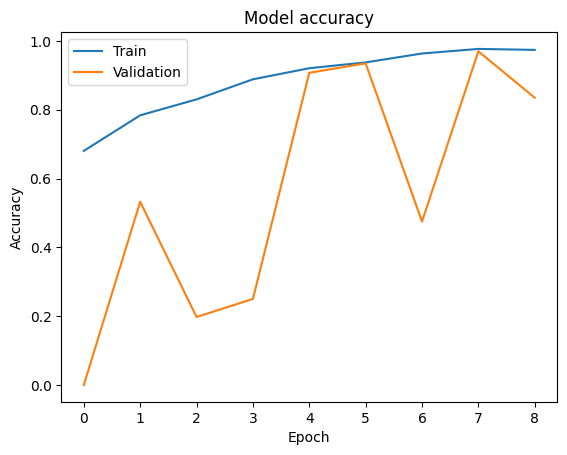

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix

In [54]:
loaded_data['images'].shape

(4000, 256, 256, 3)

In [62]:
x_ = x[0:200]

In [63]:
x_ = x_ + x[1001:1201]

In [101]:
x_ = []

In [96]:
x_.append(x[0:200])

In [97]:
x_.append(x[1001:1201])
x_.append(x[2001:2201])
x_.append(x[3001:3201])


In [143]:
x_ = x[0:100]

In [135]:
len(x_)

1

In [144]:
num_samples, height, width, channels = x_.shape

In [145]:
x_2d = x_.reshape((num_samples, height * width * channels))


In [146]:
df = pd.DataFrame(x_2d, columns=[f'pixel_{i}' for i in range(height * width * channels)])

In [147]:
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_196598,pixel_196599,pixel_196600,pixel_196601,pixel_196602,pixel_196603,pixel_196604,pixel_196605,pixel_196606,pixel_196607
0,0.145098,0.145098,0.145098,0.023529,0.023529,0.023529,0.000000,0.000000,0.000000,0.000000,...,0.662745,0.576471,0.576471,0.576471,0.549020,0.549020,0.549020,0.603922,0.603922,0.603922
1,0.047059,0.047059,0.047059,0.007843,0.007843,0.007843,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.027451,0.027451,0.027451,0.086275,0.086275,0.086275,0.133333,0.133333,0.133333
2,0.133333,0.133333,0.133333,0.023529,0.023529,0.023529,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.023529,0.023529,0.023529,0.133333,0.133333,0.133333
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.788235,0.796078,0.796078,0.796078,0.788235,0.788235,0.788235,0.796078,0.796078,0.796078
4,0.615686,0.615686,0.615686,0.486275,0.486275,0.486275,0.431373,0.431373,0.431373,0.439216,...,0.670588,0.662745,0.662745,0.662745,0.674510,0.674510,0.674510,0.678431,0.678431,0.678431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.752941,0.752941,0.752941,0.760784,0.760784,0.760784,0.756863,0.756863,0.756863,0.729412,...,0.007843,0.066667,0.066667,0.066667,0.258824,0.258824,0.258824,0.494118,0.494118,0.494118
96,0.921569,0.921569,0.921569,0.894118,0.894118,0.894118,0.886275,0.886275,0.886275,0.886275,...,0.407843,0.400000,0.400000,0.400000,0.384314,0.384314,0.384314,0.372549,0.372549,0.372549
97,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.341176,0.341176,0.341176,0.341176,0.313726,0.313726,0.313726,0.294118,0.294118,0.294118
98,0.894118,0.894118,0.894118,0.556863,0.556863,0.556863,0.207843,0.207843,0.207843,0.007843,...,0.156863,0.180392,0.180392,0.180392,0.184314,0.184314,0.184314,0.141176,0.141176,0.141176


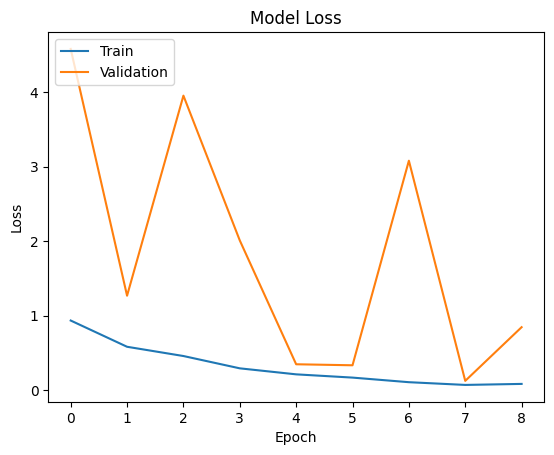

In [66]:
import matplotlib.pyplot as plt

# Assuming you have already compiled and trained your model as mentioned in your code

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [67]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [73]:
allPreds = np.array(allPreds)

In [77]:
true_labels = np.vstack(loaded_data['labels']).squeeze()

In [78]:
predicted_probs = np.vstack(allPreds).squeeze()

In [81]:
predicted_probs

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
loaded_data['labels']

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [72]:
np.array(allPreds)

array([0, 0, 0, ..., 0, 0, 0])

In [153]:
preds = allPreds[:1]


In [157]:
loaded_data['labels']

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [158]:
from sklearn.metrics import f1_score


In [ ]:
allPredictions = []

for i in loaded_data['images']:
    img = np.array(i)
    img = img / 255
    img = np.expand_dims(img, axis=0)
    prediction = model_new.predict(img)
    allPredictions.append(np.argmax(prediction[0]))

In [165]:
f1 = f1_score(loaded_data['labels'], allPredictions, average='macro')


In [166]:
f1

0.9652215387608843

In [167]:
conf_matrix = confusion_matrix(loaded_data['labels'], allPredictions)
print(conf_matrix)

[[990   8   2   0]
 [  6 994   0   0]
 [ 67  22 911   0]
 [ 11  18   5 966]]


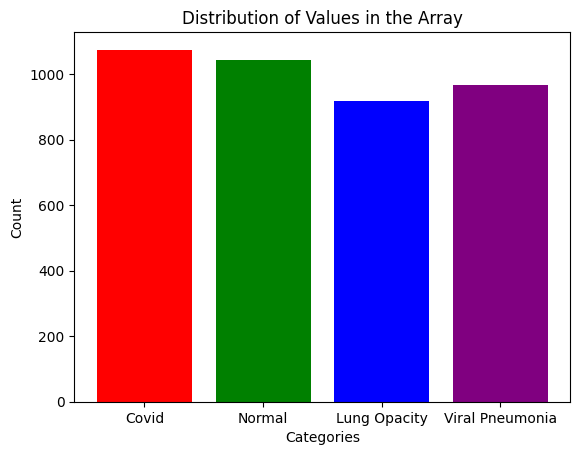

In [172]:
value_counts = np.bincount(allPredictions)

label_mapping = {
    0: 'Covid',
    1: 'Normal',
    2: 'Lung Opacity',
    3: 'Viral Pneumonia'
}

values = [0, 1, 2, 3]
plt.bar(values, value_counts[values], color=['red', 'green', 'blue', 'purple'])

plt.xticks(values, [label_mapping[val] for val in values])

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Values in the Array')
plt.show()